# Capítulo 14: Química forense: Quem roubou as cerâmicas?

Livro: Aprendendo Química com Python, Rodrigo Q. de Albuquerque & Gerd B. da Rocha, 2021, Amazon Book.

E-Mail: learn.chem.python@gmail.com

### Versão do Python usada

In [1]:
import sys
print(sys.version)

3.7.10 | packaged by conda-forge | (default, Feb 19 2021, 16:07:37) 
[GCC 9.3.0]


### Caixa de sessão interativa 47: Importando arquivos .csv com Pandas

In [1]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
suspects = pd.read_csv('suspects.csv')
suspects

,Suspect,Na2O,MgO,Al2O3,SiO2,K2O,CaO
0,A,62.3250,88.5290,56.4340,55.5349,12.3505,67.6042
1,B,52.2787,14.3208,56.4533,49.3661,79.0053,45.0288
2,C,57.9784,48.1847,94.4986,50.9542,48.8107,53.8675


In [3]:
data = pd.read_csv('dataset.csv')
data

,Expositor,Na2O,MgO,Al2O3,SiO2,K2O,CaO
0,Sarah Gordon,61.0848,22.5785,46.5764,45.4828,56.8108,32.8381
1,John Smith,45.0248,73.9207,50.8347,81.9649,44.0979,39.8057
2,John Smith,32.4749,48.4776,66.3689,78.5381,23.4227,100.1000
3,John Smith,19.6655,89.7197,59.5002,84.5850,32.6948,72.5226
4,John Smith,24.8823,66.8630,86.3564,77.5906,39.0820,54.4464
...,...,...,...,...,...,...,...
95,John Smith,23.5325,62.6577,81.1289,84.3023,13.5579,85.8585
96,John Smith,23.4855,69.1654,21.3812,65.9542,20.1392,58.4875
97,Sarah Gordon,46.5608,7.4845,93.8832,20.1160,75.5314,41.7696
98,John Smith,15.6147,63.5472,77.8860,78.5308,49.0811,78.7692


### 

In [4]:
data.describe()

,Na2O,MgO,Al2O3,SiO2,K2O,CaO
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,41.518716,47.739194,56.516911,53.431247,50.258311,49.908181
std,23.807219,25.496401,20.819292,24.965526,21.068675,23.149488
min,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000
25%,21.594500,25.420500,44.042825,30.323300,33.383900,32.813600
50%,41.830100,49.437050,54.625700,49.790000,51.617300,52.085100
75%,60.188150,69.230475,73.041025,77.825650,67.125150,68.388975
max,100.100000,100.100000,100.100000,100.100000,100.100000,100.100000


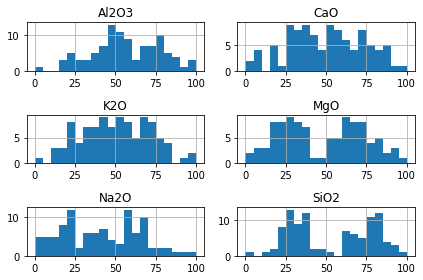

In [5]:
data.hist(bins = 20)
plt.tight_layout()
plt.show()

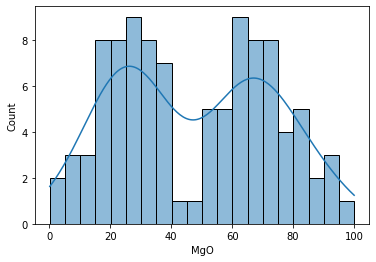

In [6]:
import seaborn as sns
sns.histplot
sns.histplot(data['MgO'], bins = 20, kde = True)
plt.show()

### Caixa de código 36: Preparação dos dados

In [7]:
# NOTA: as bibliotecas e dados foram importados anteriormente
X = data.drop(['Expositor'], axis = 1)      # var/expositores
y = data['Expositor']                 # nomes dos expositores
X_susp = suspects.drop(['Suspect'], axis = 1)     # suspeitos
labels = []
for i in range(y.shape[0]):
    if y[i] == 'Sarah Gordon':
        labels.append('red')                    # expositor 1
    else:
        labels.append('blue')                   # expositor 2
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()     # objeto para pré-processamento
X = scaler.fit_transform(X)                  # X é redefinido
X_susp = scaler.transform(X_susp)       # X_susp é redefinido

### Caixa de sessão interativa 48: Análise de componentes principais das amostras dos expositores

In [8]:
model = PCA(5)       # 5 componentes principais serão geradas
model.fit(X)       # calcule as componentes principais para X
scores = model.transform(X)   # novas coordenadas (PC1 a PC5)
pc1 = scores[:,0]  # novas coordenadas (PC1) das 100 amostras

In [9]:
pc1[0]    # nova coordenada (PC1) da primeira amostra somente

1.4343597099676173

In [10]:
pc2 = scores[:,1]  # novas coordenadas (PC2) das 100 amostras

In [11]:
weight1 = model.components_[0]   # loadings da componente PC1
for i in range(weight1.shape[0]):
    print(f'{data.columns[i+1]:<5} ==> {weight1[i]:+.2f}')

Na2O  ==> +0.43
MgO   ==> -0.45
Al2O3 ==> -0.03
SiO2  ==> -0.48
K2O   ==> +0.44
CaO   ==> -0.43


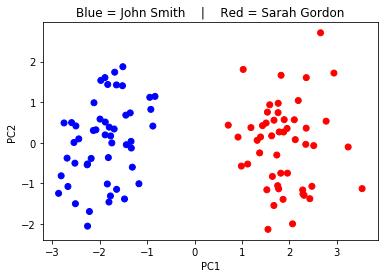

In [12]:
plt.scatter(pc1, pc2, c = labels)
plt.title('Blue = John Smith    |    Red = Sarah Gordon')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

### Caixa de código 37: Inclusão das amostras dos suspeitos no modelo anterior

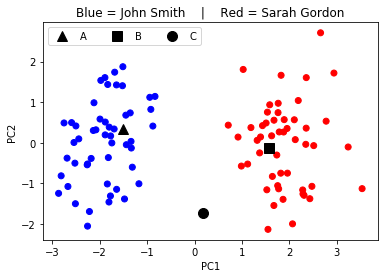

In [13]:
scores_s = model.transform(X_susp)
plt.scatter(pc1, pc2, c = labels)
plt.plot(scores_s[0,0], scores_s[0,1], 'k^', ms = 10, label='A')
plt.plot(scores_s[1,0], scores_s[1,1], 'ks', ms = 10, label='B')
plt.plot(scores_s[2,0], scores_s[2,1], 'ko', ms = 10, label='C')
plt.legend(loc = 2, ncol = 3)
plt.title('Blue = John Smith    |    Red = Sarah Gordon')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()